In [1]:
# importing all the necessary libararies

import numpy as np # used for working with arrays
import pandas as pd  # used for manipulating the dataframes
import matplotlib.pyplot as plt # used in visualizing the graphs
import seaborn as sns # used in visualizing the graphs
import warnings  # used to ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_campaign_dataset.csv') # creating the pandas dataframe by loading the csv file

In [3]:
df.shape # displays the total number of rows and columns present in the dataframe

(200000, 16)

In [4]:
df.head() # displays the first five records in the dataframe

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [5]:
df.tail() # displays the last five records in the dataframe

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


# Data Cleaning

In [6]:
# checking the sum/count of all missing values using the isnull()
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

#### There are no missing values present in the data

In [7]:
# used for chekcing the total number of non-null counts and datatype of every variable in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [8]:
df.columns # displays the list of all columns present in the dataframe

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [9]:
# Converting 'Campaign_ID' column from float to object datatype using apply() 
df['Campaign_ID'] = df['Campaign_ID'].apply(str)

# Clean and convert 'Acquisition_Cost' column to float using apply() and lambda functions
df['Acquisition_Cost'] = df['Acquisition_Cost'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Convert 'Date' column to datetime format using apply()
df['Date'] = df['Date'].apply(pd.to_datetime, format='%Y-%m-%d')


In [10]:
df.dtypes # dispalys all the datatypes of all the columns in the dataframe

Campaign_ID                 object
Company                     object
Campaign_Type               object
Target_Audience             object
Duration                    object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                    object
Language                    object
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment            object
Date                datetime64[ns]
dtype: object

In [11]:
df.head() # chekcing the values after the conversion

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [12]:
df['Company'].unique() # unique() displays all the unique values present in the column

array(['Innovate Industries', 'NexGen Systems', 'Alpha Innovations',
       'DataTech Solutions', 'TechCorp'], dtype=object)

In [13]:
df['Campaign_Type'].unique() # unique() displays all the unique values present in the column

array(['Email', 'Influencer', 'Display', 'Search', 'Social Media'],
      dtype=object)

In [14]:
df['Target_Audience'].unique() # unique() displays all the unique values present in the column

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [15]:
df['Duration'].unique() # unique() displays all the unique values present in the column

array(['30 days', '60 days', '15 days', '45 days'], dtype=object)

In [16]:
df['Channel_Used'].unique() # unique() displays all the unique values present in the column

array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
       'Email'], dtype=object)

In [17]:
df['Location'].unique() # unique() displays all the unique values present in the column

array(['Chicago', 'New York', 'Los Angeles', 'Miami', 'Houston'],
      dtype=object)

In [18]:
df['Customer_Segment'].unique() # unique() displays all the unique values present in the column

array(['Health & Wellness', 'Fashionistas', 'Outdoor Adventurers',
       'Foodies', 'Tech Enthusiasts'], dtype=object)

In [19]:
df.describe().T # shows the statistical information about the numerical columns

,count,mean,min,25%,50%,75%,max,std
Conversion_Rate,200000.0,0.08007,0.01,0.05,0.08,0.12,0.15,0.040602
Acquisition_Cost,200000.0,12504.39304,5000.0,8739.75,12496.5,16264.0,20000.0,4337.664545
ROI,200000.0,5.002438,2.0,3.5,5.01,6.51,8.0,1.734488
Clicks,200000.0,549.77203,100.0,325.0,550.0,775.0,1000.0,260.019056
Impressions,200000.0,5507.30152,1000.0,3266.0,5517.5,7753.0,10000.0,2596.864286
Engagement_Score,200000.0,5.49471,1.0,3.0,5.0,8.0,10.0,2.872581
Date,200000,2021-07-01 23:35:09.600000,2021-01-01 00:00:00,2021-04-02 00:00:00,2021-07-02 00:00:00,2021-10-01 00:00:00,2021-12-31 00:00:00,NaN


# Data Manipulation and Exploratory Data Analysis

## 1. sorting

In [20]:
sorted_by_cost = df.sort_values(by='Acquisition_Cost', ascending=False) # sorting the values of a 'Acquisition_cost' column in a descending order 

In [21]:
sorted_by_cost.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
197024,197025,Innovate Industries,Display,Men 25-34,45 days,Website,0.12,20000.0,7.14,New York,Spanish,353,2253,7,Foodies,2021-10-17
117597,117598,TechCorp,Social Media,Men 18-24,30 days,Facebook,0.02,20000.0,7.67,Los Angeles,German,776,3277,2,Health & Wellness,2021-03-09
153567,153568,Innovate Industries,Influencer,Women 35-44,60 days,Google Ads,0.05,20000.0,6.33,New York,Spanish,420,4835,1,Tech Enthusiasts,2021-09-25
190322,190323,Innovate Industries,Display,Women 35-44,15 days,Instagram,0.03,20000.0,5.01,Chicago,French,849,5307,1,Outdoor Adventurers,2021-06-07
138025,138026,NexGen Systems,Email,Men 18-24,15 days,YouTube,0.05,20000.0,3.25,Houston,English,500,6431,3,Health & Wellness,2021-02-25


## 2. Filtering

In [22]:
# 2. Filtering data where 'Channel_Used' is 'Google Ads'
google_ads_campaigns = df[df['Channel_Used'] == 'Google Ads']


In [23]:
google_ads_campaigns.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,13280.0,5.55,Los Angeles,Mandarin,624,7854,7,Outdoor Adventurers,2021-01-08
11,12,Innovate Industries,Influencer,Men 25-34,60 days,Google Ads,0.05,17502.0,3.59,Los Angeles,Mandarin,659,8948,1,Foodies,2021-01-12
18,19,Alpha Innovations,Social Media,Men 25-34,60 days,Google Ads,0.07,19224.0,6.08,New York,French,182,5798,1,Foodies,2021-01-19


## 3. Grouping

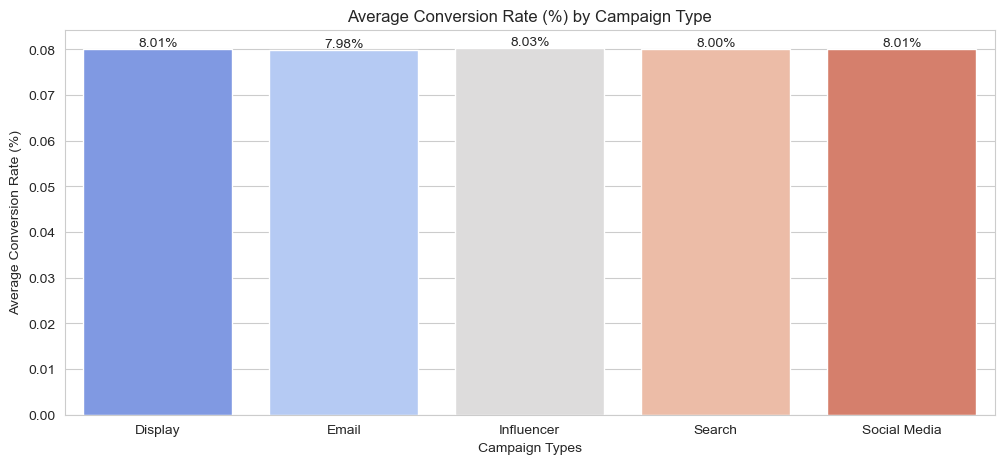

In [27]:

# Compute the average conversion rate per campaign type
avg_conversion_rate = df.groupby('Campaign_Type', as_index=False)['Conversion_Rate'].mean()

# Create a bar plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=avg_conversion_rate, x='Campaign_Type', y='Conversion_Rate', palette='coolwarm')

# Add labels
plt.title('Average Conversion Rate (%) by Campaign Type')
plt.xlabel('Campaign Types')
plt.ylabel('Average Conversion Rate (%)')

# Display values on bars
for bar, value in zip(ax.patches, avg_conversion_rate['Conversion_Rate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.2%}', 
             ha='center', va='bottom', fontsize=10)

plt.show()


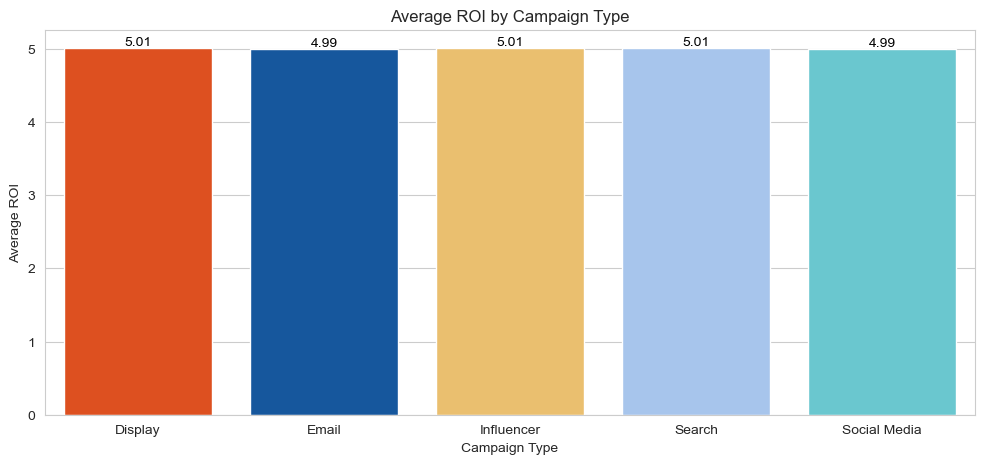

In [28]:

# Compute the average ROI per campaign type
avg_roi = df.groupby('Campaign_Type', as_index=False)['ROI'].mean()

# Create the bar plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=avg_roi, x='Campaign_Type', y='ROI', palette=['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0'])

# Add labels
plt.title('Average ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average ROI')

# Display values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=0)
plt.show()


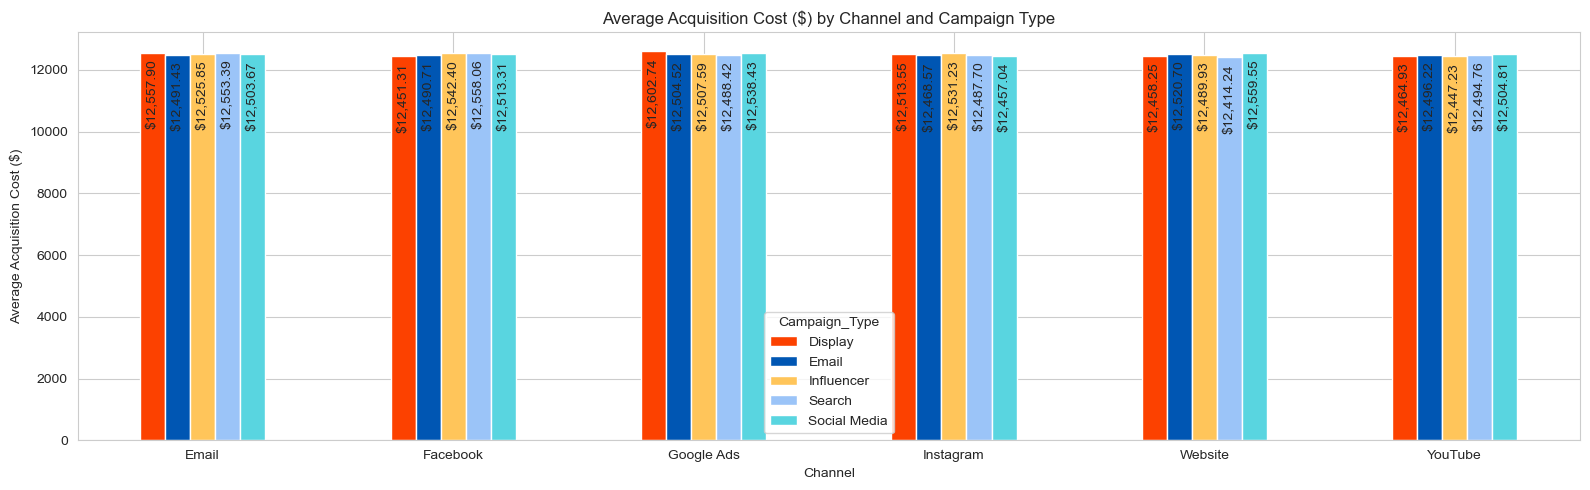

In [31]:
# Average Acquisition Cost across different Channel and Campaign Type
avg_acquisition_cost_by_channel_and_campaign_type = df.groupby(['Channel_Used', 'Campaign_Type'])['Acquisition_Cost'].mean().unstack()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot data as a bar chart
bars = avg_acquisition_cost_by_channel_and_campaign_type.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Acquisition Cost ($) by Channel and Campaign Type')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.ylabel('Average Acquisition Cost ($)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, -30),
                  textcoords='offset points',
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

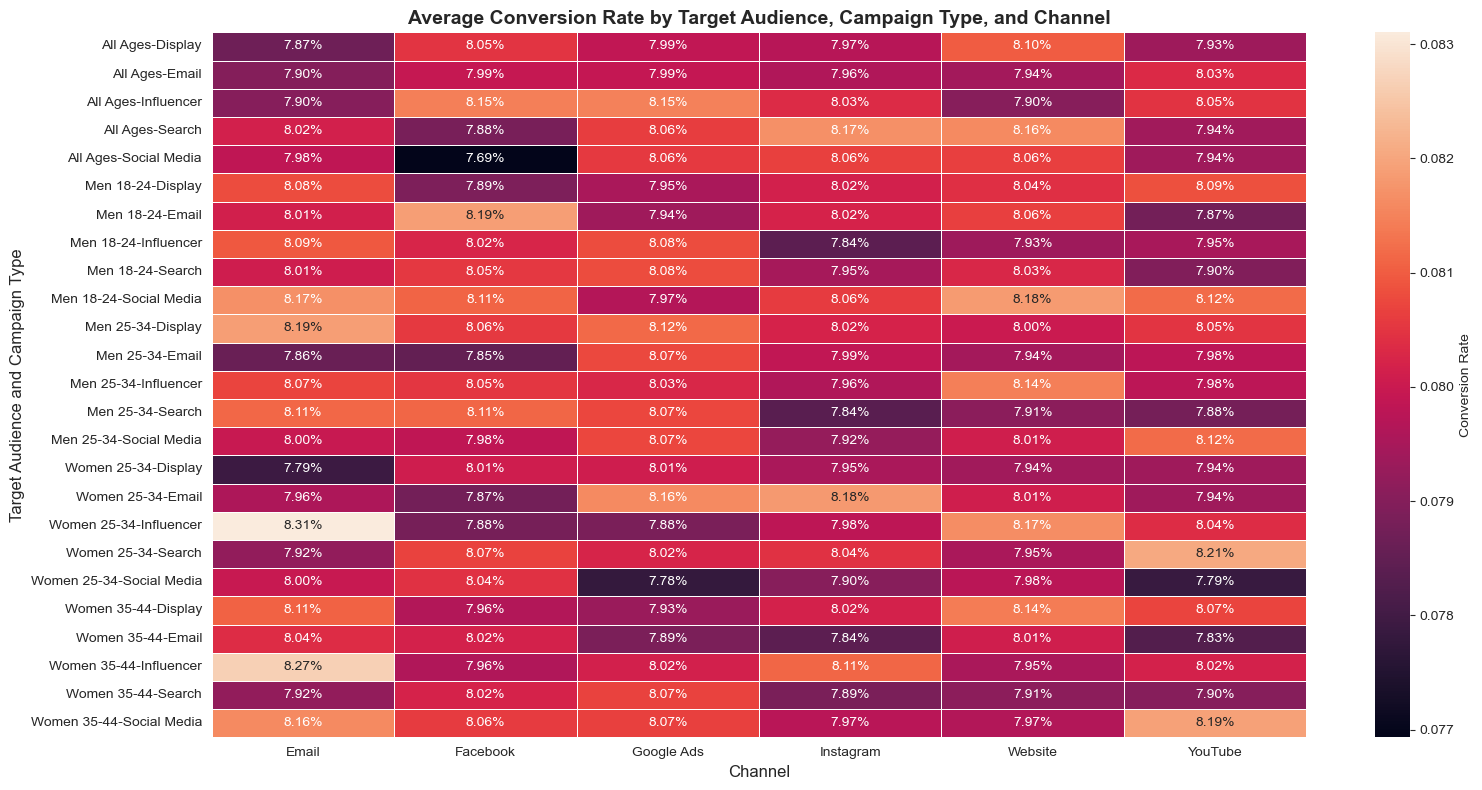

In [32]:

# Compute the mean conversion rate for each combination of Target Audience, Campaign Type, and Channel
conversion_rate_avg = df.pivot_table(values='Conversion_Rate', index=['Target_Audience', 'Campaign_Type'], 
                                     columns='Channel_Used', aggfunc='mean')

# Create a heatmap to visualize the data
plt.figure(figsize=(16, 8))
sns.heatmap(conversion_rate_avg, annot=True, fmt='.2%', linewidths=0.5, cbar_kws={'label': 'Conversion Rate'})

# Add title and axis labels
plt.title('Average Conversion Rate by Target Audience, Campaign Type, and Channel', fontsize=14, fontweight='bold')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Target Audience and Campaign Type', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


This heatmap displays the average conversion rate for various combinations of target audiences, campaign types, and marketing channels. Here's a detailed explanation:

Y-Axis: Represents combinations of target audiences and campaign types, such as "Men 18-24 - Display" or "Women 25-34 - Search."

X-Axis: Shows different marketing channels, including "Email," "Facebook," "Google Ads," "Instagram," "Website," and "YouTube."

Color Intensity: Reflects the conversion rate. A lighter color indicates a higher conversion rate, while a darker color represents a lower rate. The color bar on the right shows the scale, with conversion rates ranging from approximately 7.7% to 8.3%.

Key Insights:

Top-Performing Combinations:

The combination of "Women 35-44 - Influencer on YouTube" achieves one of the highest conversion rates at 8.19%.

"Men 18-24 - Social Media on Google Ads" also shows a strong conversion rate of 8.18%.

Another notable combination is "Women 35-44 - Search on Instagram," with a conversion rate of 8.11%.

Campaign Channels:

Email and Google Ads consistently yield high conversion rates across various target audiences and campaign types, often exceeding 8%.
Underperforming Combinations:

The lowest conversion rates are seen in the darker sections, particularly for channels like Social Media targeting the "All Ages" audience on Facebook and Instagram, with rates around 7.69% to 7.98%.

This heatmap offers valuable insights for marketers, enabling them to pinpoint the audience, campaign type, and channel combinations that drive higher conversion rates, thus refining their marketing strategies.

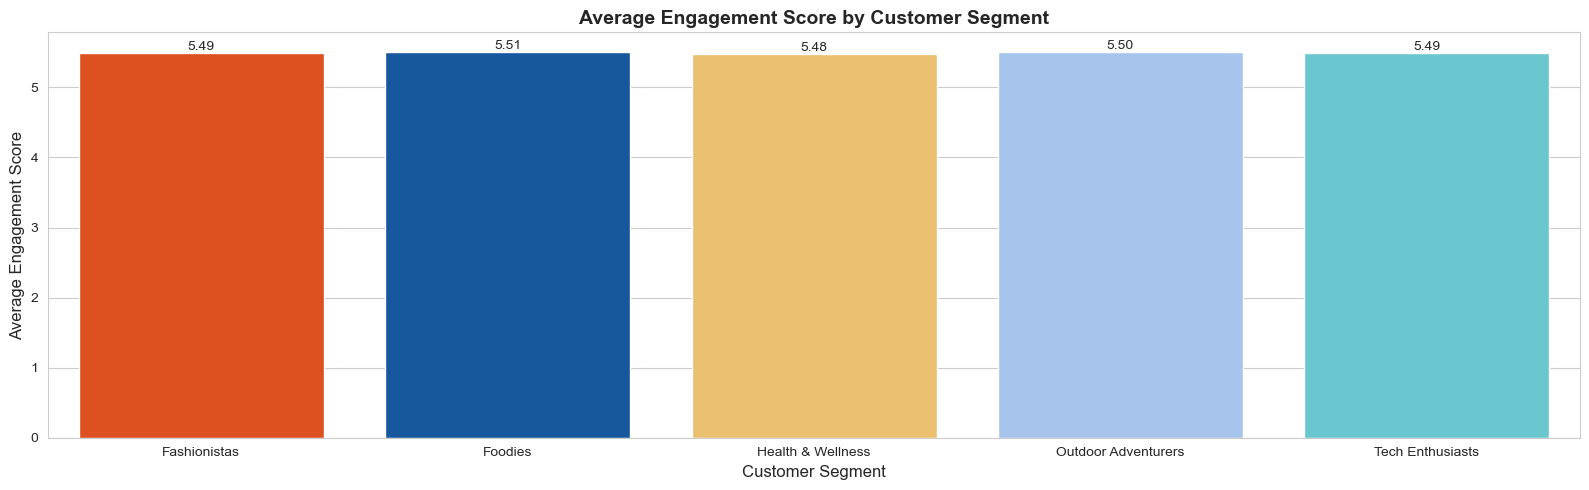

In [33]:


# Calculate the average engagement score for each customer segment
avg_engagement = df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()

# Set up the figure size
plt.figure(figsize=(16, 5))

# Create a bar plot using Seaborn
sns.barplot(data=avg_engagement, x='Customer_Segment', y='Engagement_Score', palette=['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0'])

# Add title and axis labels
plt.title('Average Engagement Score by Customer Segment', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.xticks(rotation=0)

# Add data labels on top of each bar
for index, row in avg_engagement.iterrows():
    plt.text(index, row['Engagement_Score'], f'{row["Engagement_Score"]:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


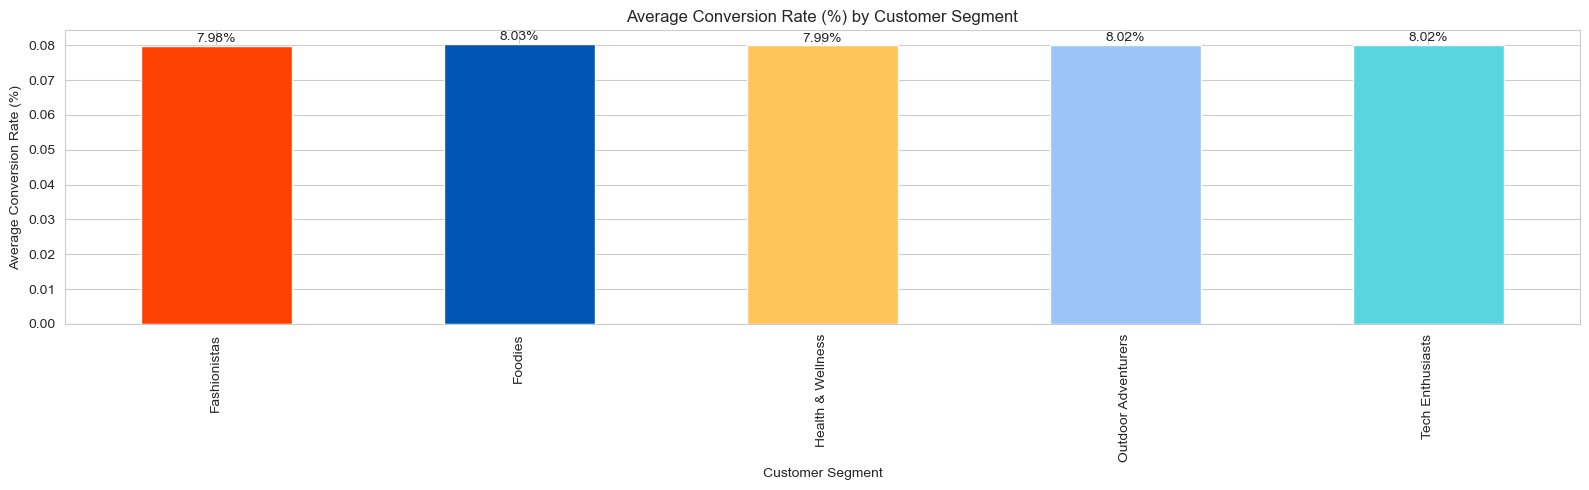

In [34]:
# Calculate average conversion rate per customer segment
segment_conversion_rate = df.groupby('Customer_Segment')['Conversion_Rate'].mean()

# Define the colors for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the bar chart with the calculated conversion rates
ax = segment_conversion_rate.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set chart title and axis labels
ax.set_title('Average Conversion Rate (%) by Customer Segment')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Average Conversion Rate (%)')

# Display the percentage on top of each bar
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2%}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


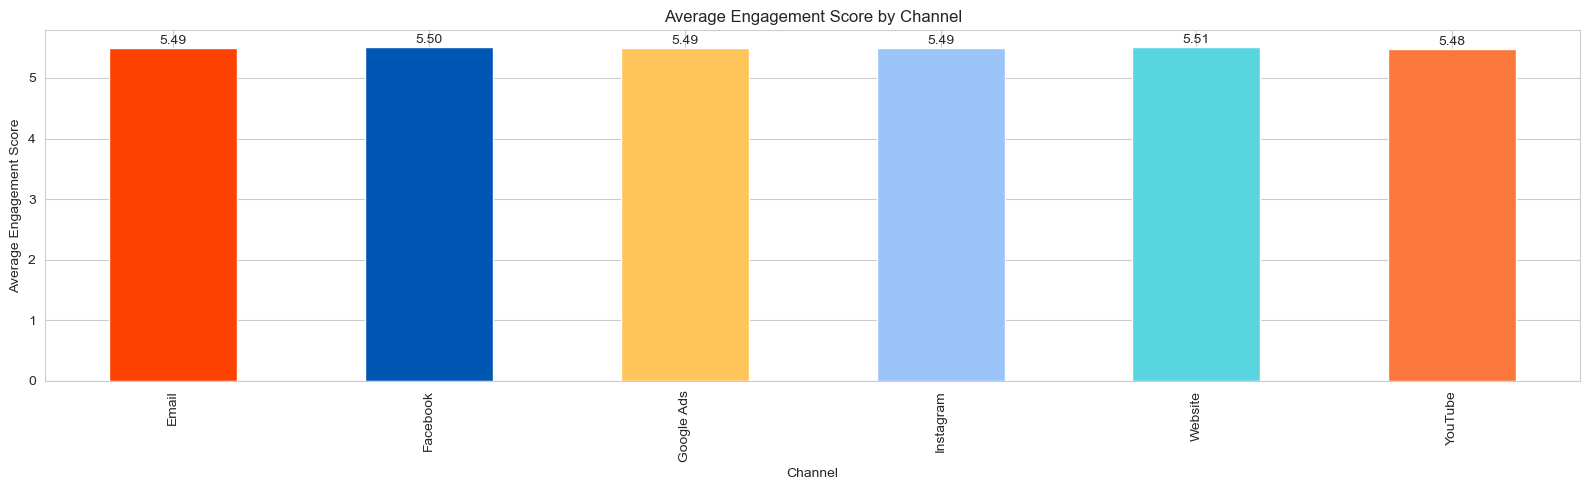

In [35]:
# Calculate the average engagement score for each channel
channel_engagement_score = df.groupby('Channel_Used')['Engagement_Score'].mean()

# Set the colors for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the bar chart with the calculated engagement scores
ax = channel_engagement_score.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and axis labels for the chart
ax.set_title('Average Engagement Score by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Average Engagement Score')

# Display the score on top of each bar
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


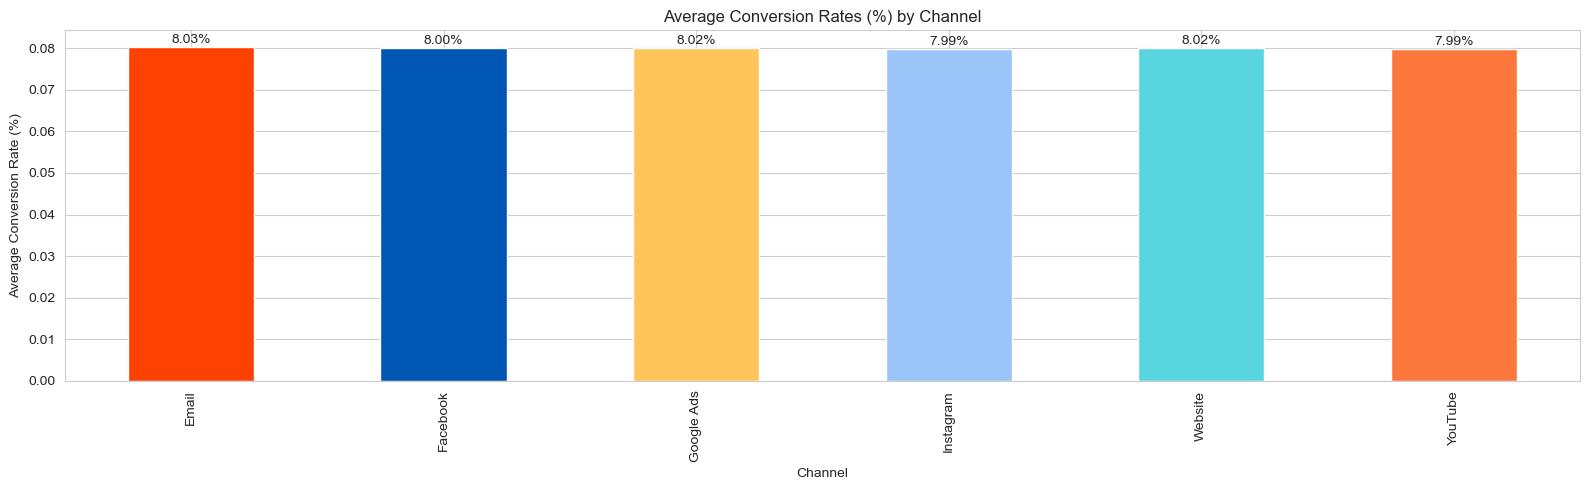

In [36]:
# Calculate the average conversion rates by channel
conversion_rate_by_channel = df.groupby('Channel_Used')['Conversion_Rate'].mean()

# Define colors for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the bar chart with the calculated conversion rates
ax = conversion_rate_by_channel.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and axis labels
ax.set_title('Average Conversion Rates (%) by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Average Conversion Rate (%)')

# Annotate each bar with its value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2%}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


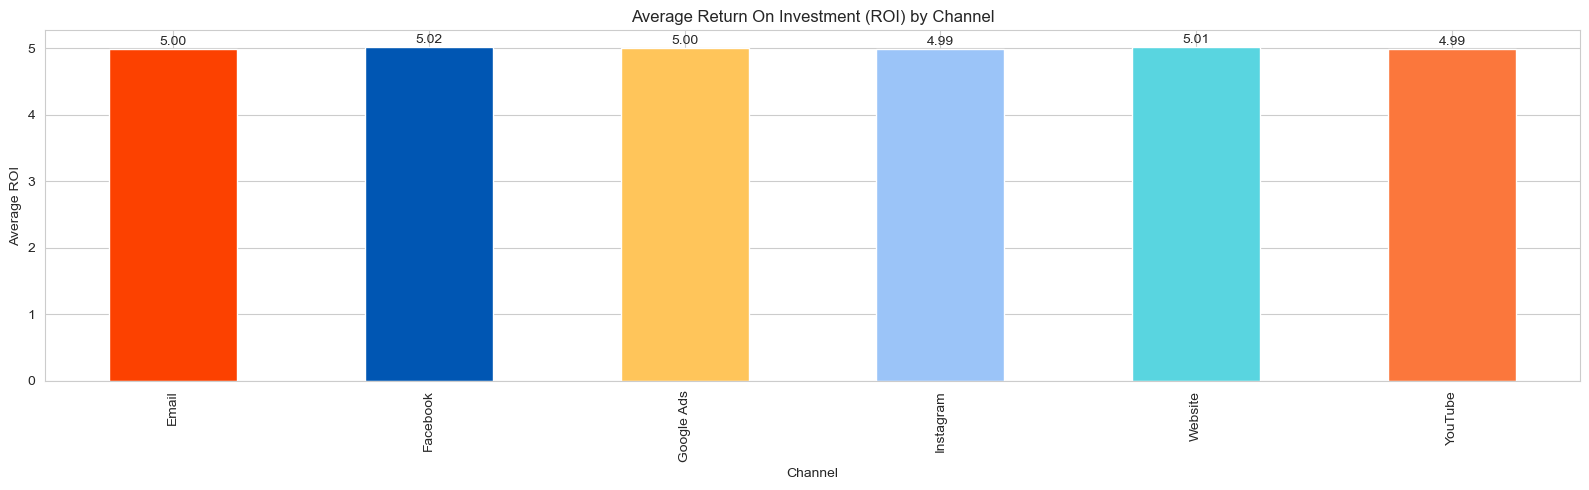

In [37]:
# Calculate the average ROI by channel
roi_by_channel = df.groupby('Channel_Used')['ROI'].mean()

# Set the color scheme for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Create a bar chart with the calculated ROI values
ax = roi_by_channel.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and labels for the chart
ax.set_title('Average Return On Investment (ROI) by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Average ROI')

# Display the ROI value on top of each bar
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


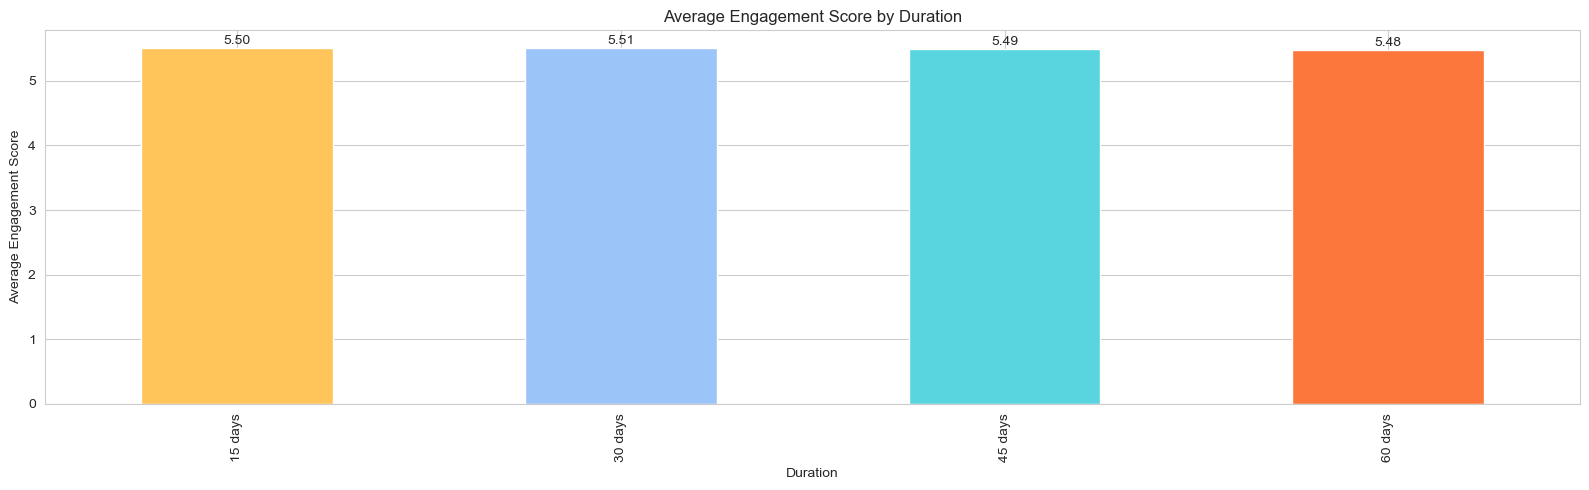

In [38]:
# Calculate the average engagement score for each duration
engagement_score_by_duration = df.groupby('Duration')['Engagement_Score'].mean()

# Define a color scheme for the bars
bar_colors = ['#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the bar chart with the calculated engagement scores
ax = engagement_score_by_duration.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and labels for the chart
ax.set_title('Average Engagement Score by Duration')
ax.set_xlabel('Duration')
ax.set_ylabel('Average Engagement Score')

# Annotate each bar with its value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


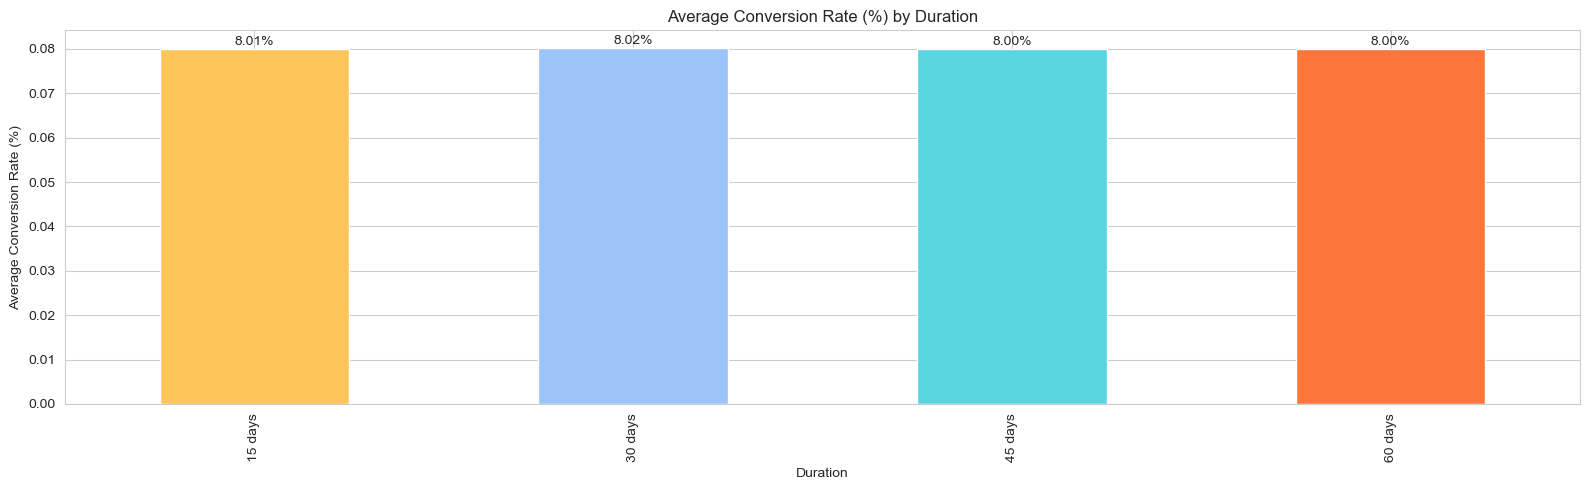

In [39]:
# Calculate the average conversion rates for each duration
conversion_rate_by_duration = df.groupby('Duration')['Conversion_Rate'].mean()

# Define a color palette for the bars
bar_colors = ['#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the bar chart for the conversion rates
ax = conversion_rate_by_duration.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and labels for the plot
ax.set_title('Average Conversion Rate (%) by Duration')
ax.set_xlabel('Duration')
ax.set_ylabel('Average Conversion Rate (%)')

# Annotate each bar with the corresponding value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2%}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


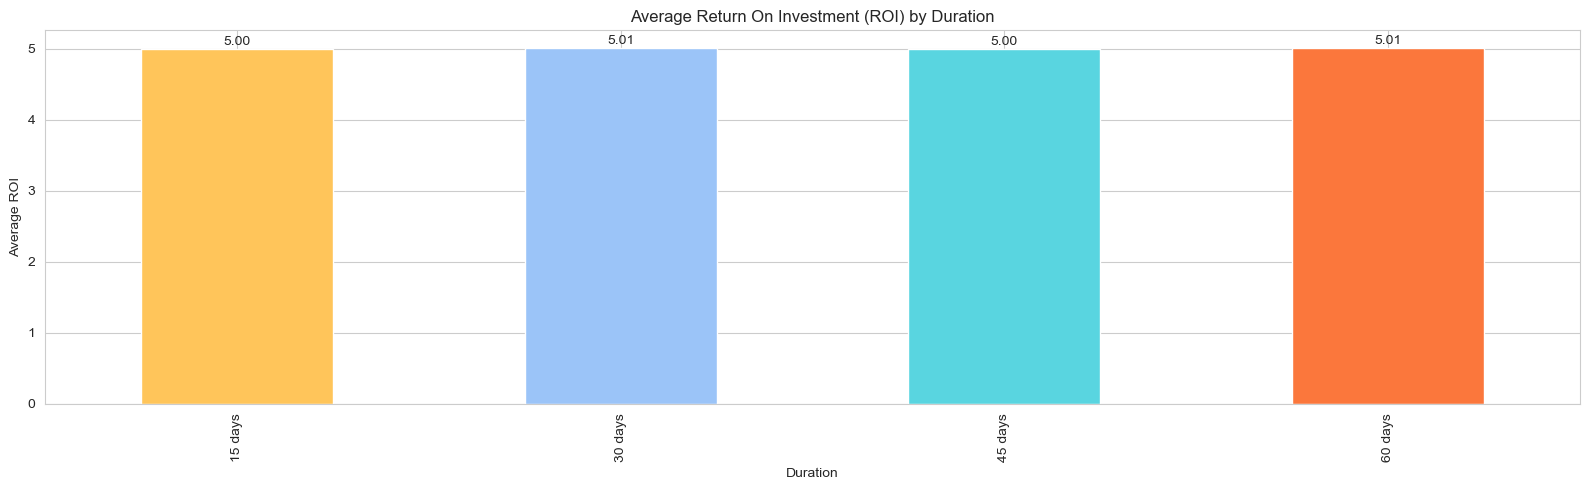

In [40]:
# Calculate the average ROI for each duration
roi_by_duration = df.groupby('Duration')['ROI'].mean()

# Define the color palette for the bars
bar_colors = ['#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Create a bar chart to plot the ROI by duration
ax = roi_by_duration.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the chart title and axis labels
ax.set_title('Average Return On Investment (ROI) by Duration')
ax.set_xlabel('Duration')
ax.set_ylabel('Average ROI')

# Add the ROI value above each bar
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


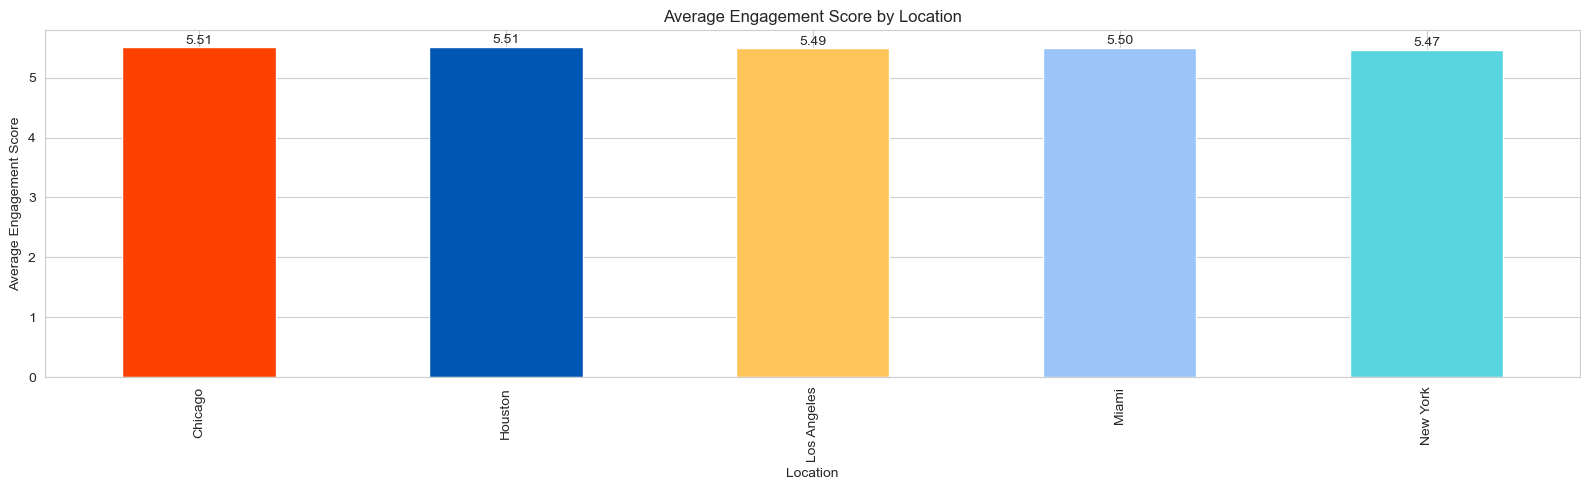

In [41]:
# Calculate the average engagement score for each location
engagement_score_by_location = df.groupby('Location')['Engagement_Score'].mean()

# Define a color palette for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the bar chart for engagement scores by location
ax = engagement_score_by_location.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and labels for the chart
ax.set_title('Average Engagement Score by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Average Engagement Score')

# Add the engagement score value on top of each bar
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


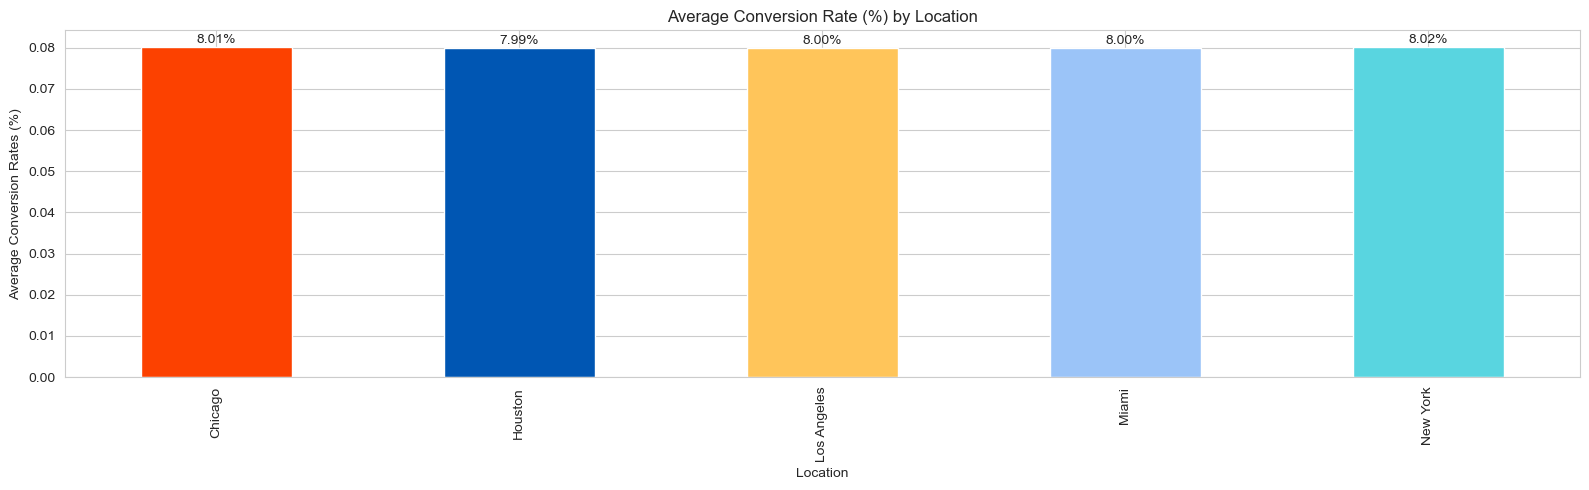

In [42]:
# Calculate the average conversion rates for each location
conversion_rate_by_location = df.groupby('Location')['Conversion_Rate'].mean()

# Set the color palette for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the bar chart for conversion rates by location
ax = conversion_rate_by_location.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the chart title and axis labels
ax.set_title('Average Conversion Rate (%) by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Average Conversion Rates (%)')

# Annotate each bar with the conversion rate value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2%}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


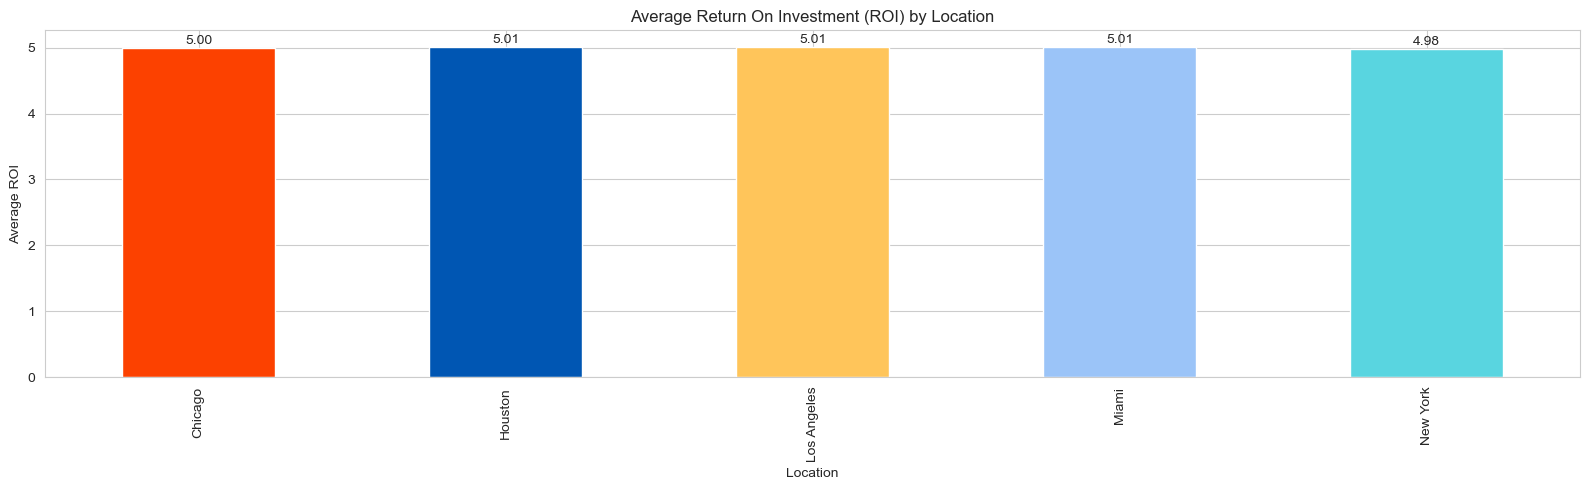

In [43]:
# Calculate the average ROI for each location
roi_by_location = df.groupby('Location')['ROI'].mean()

# Define the color scheme for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Generate the bar chart for ROI by location
ax = roi_by_location.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the plot title and axis labels
ax.set_title('Average Return On Investment (ROI) by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Average ROI')

# Annotate each bar with its corresponding ROI value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


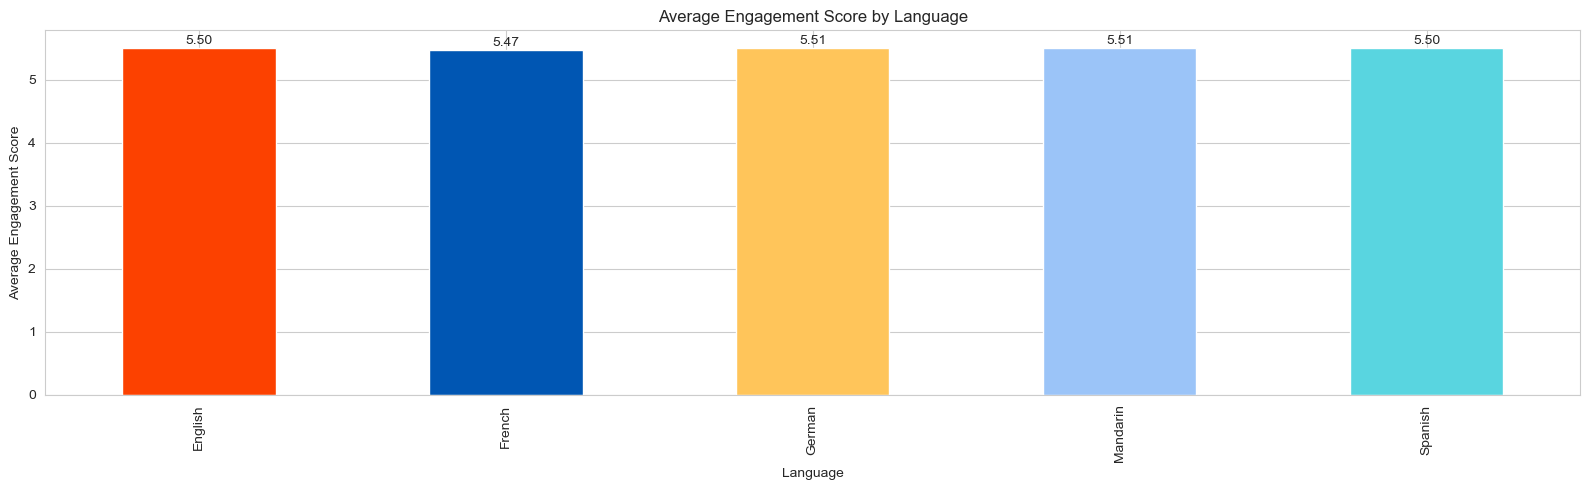

In [44]:
# Compute the average engagement score for each language
engagement_score_by_language = df.groupby('Language')['Engagement_Score'].mean()

# Define the color palette for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Create a bar chart for the engagement scores by language
ax = engagement_score_by_language.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the chart title and axis labels
ax.set_title('Average Engagement Score by Language')
ax.set_xlabel('Language')
ax.set_ylabel('Average Engagement Score')

# Add the engagement score value above each bar
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


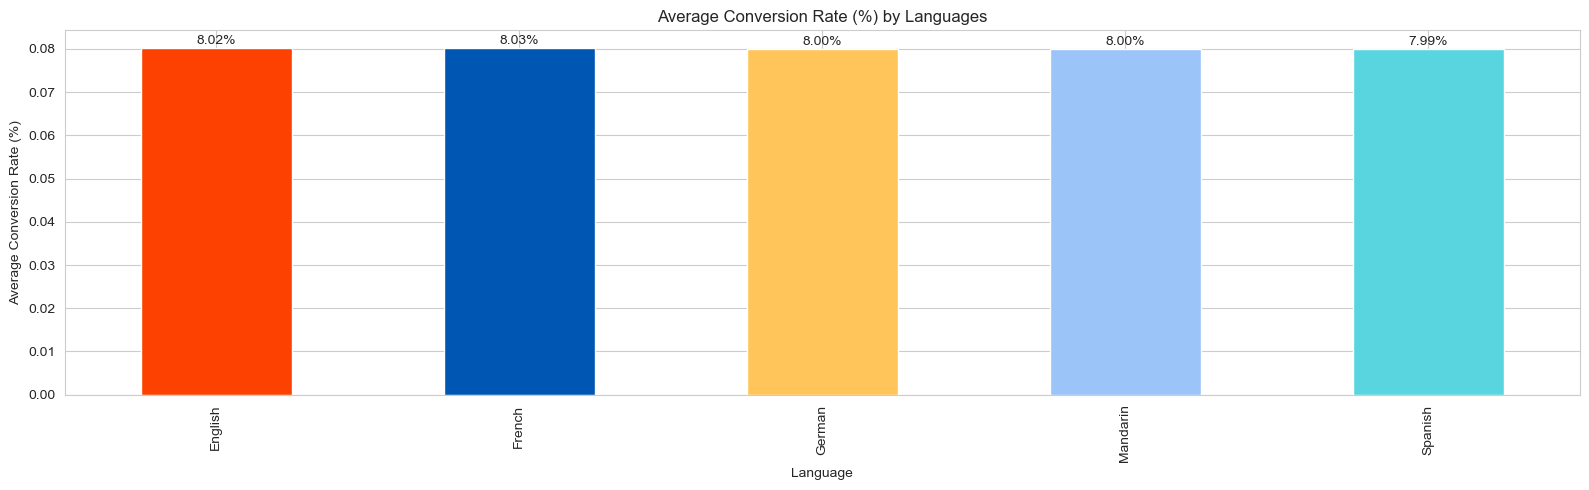

In [45]:
# Calculate the average conversion rates for each language
conversion_rate_by_language = df.groupby('Language')['Conversion_Rate'].mean()

# Define the color palette for the bars
color_palette = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Create a bar chart to visualize conversion rates by language
ax = conversion_rate_by_language.plot(kind='bar', color=color_palette, figsize=(16, 5))

# Set the title and axis labels
ax.set_title('Average Conversion Rate (%) by Languages')
ax.set_xlabel('Language')
ax.set_ylabel('Average Conversion Rate (%)')

# Annotate each bar with its conversion rate value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2%}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


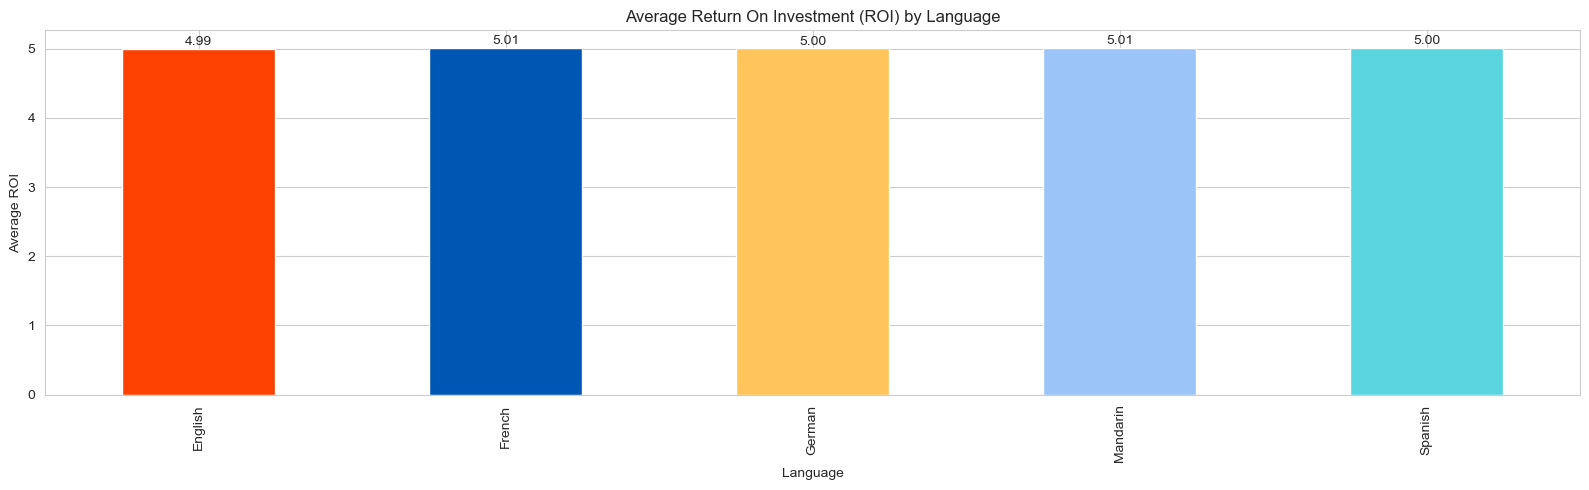

In [46]:
# Compute the average ROI for each language
roi_by_language = df.groupby('Language')['ROI'].mean()

# Define the color scheme for the bars
bar_colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
ax = roi_by_language.plot(kind='bar', color=bar_colors, figsize=(16, 5))

# Set the title and labels for the axes
ax.set_title('Average Return On Investment (ROI) by Language')
ax.set_xlabel('Language')
ax.set_ylabel('Average ROI')

# Annotate each bar with its corresponding ROI value
for bar in ax.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.2f}',
                (bar.get_x() + bar.get_width() / 2, bar_height),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## Computing Correlation

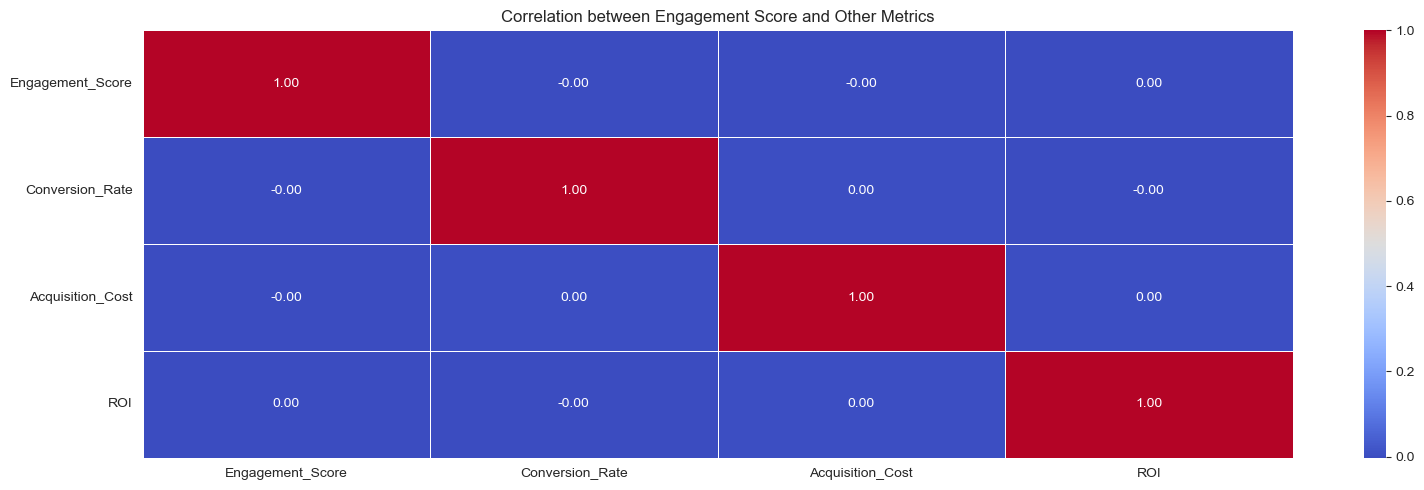

In [47]:
# Select the columns of interest for the correlation analysis
selected_metrics = df[['Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI']]

# Compute the correlation matrix for the selected metrics
correlation_data = selected_metrics.corr()

# Create a heatmap to display the correlation values
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Engagement Score and Other Metrics')
plt.xticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()


Key Insights:

Engagement Score:

There is little to no correlation between Engagement Score and metrics such as Conversion Rate, Acquisition Cost, or ROI, suggesting that engagement levels do not directly influence these outcomes.

Conversion Rate:

Similar to Engagement Score, Conversion Rate does not exhibit a strong correlation with Acquisition Cost or ROI, indicating that higher conversion rates do not necessarily affect customer acquisition costs or overall return on investment.

Acquisition Cost:

Acquisition Cost and ROI show no significant relationship, as the correlation is close to 0.00. This implies that the cost of acquiring customers does not have a predictable impact on ROI.

ROI:

ROI is not strongly correlated with other metrics like Engagement Score, Conversion Rate, or Acquisition Cost.
    
Conclusion:

The heatmap reveals that the key metrics—Engagement Score, Conversion Rate, Acquisition Cost, and ROI—do not exhibit strong interdependencies, with all correlation values remaining near zero. This suggests that these metrics are independent in this dataset, and improving one does not necessarily lead to changes in the others.

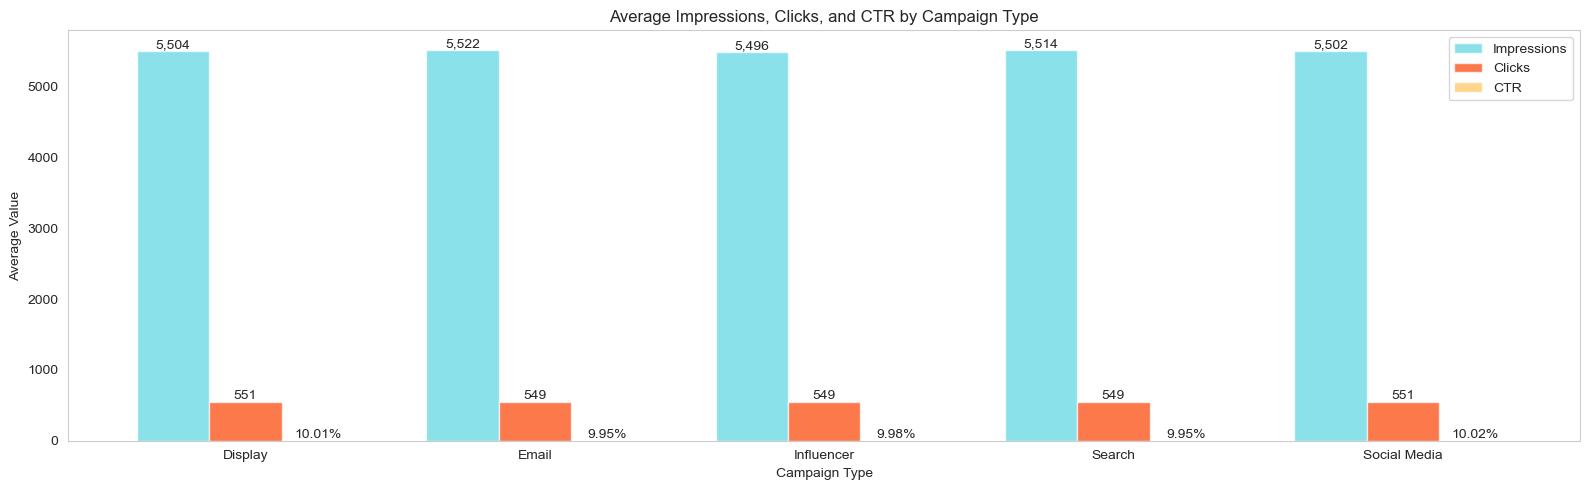

In [48]:
# Calculate the average number of Impressions by Campaign Type
average_impressions = df.groupby('Campaign_Type')['Impressions'].mean()

# Calculate the average number of Clicks by Campaign Type
average_clicks = df.groupby('Campaign_Type')['Clicks'].mean()

# Calculate the average Click-Through Rate (CTR)
ctr_average = average_clicks / average_impressions

bar_width = 0.25
x_positions = range(len(average_impressions))

# Plot the bars for Impressions, Clicks, and CTR
plt.figure(figsize=(16, 5))
impressions_bars = plt.bar(x_positions, average_impressions, bar_width, label='Impressions', color='#59D5E0', alpha=0.7)
clicks_bars = plt.bar([i + bar_width for i in x_positions], average_clicks, bar_width, label='Clicks', color='#FC4100', alpha=0.7)
ctr_bars = plt.bar([i + 2 * bar_width for i in x_positions], ctr_average, bar_width, label='CTR', color='#FFC55A', alpha=0.7)

# Add the plot title and labels
plt.title('Average Impressions, Clicks, and CTR by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Value')
plt.xticks([i + bar_width for i in x_positions], average_impressions.index, rotation=0)

# Function to add data labels
def add_data_labels(bars, is_ctr=False):
    for bar in bars:
        height = bar.get_height()
        label = f'{height:.2%}' if is_ctr else f'{height:,.0f}'
        plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

add_data_labels(impressions_bars)
add_data_labels(clicks_bars)
add_data_labels(ctr_bars, is_ctr=True)

# Disable grid lines
plt.grid(False)

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [49]:
# Extract the year and month from the 'Date' column for time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group data by year and month to analyze the performance of campaigns over time
monthly_campaign_performance = df.groupby(['Year', 'Month']).agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean', 
    'ROI': 'mean'
}).reset_index()


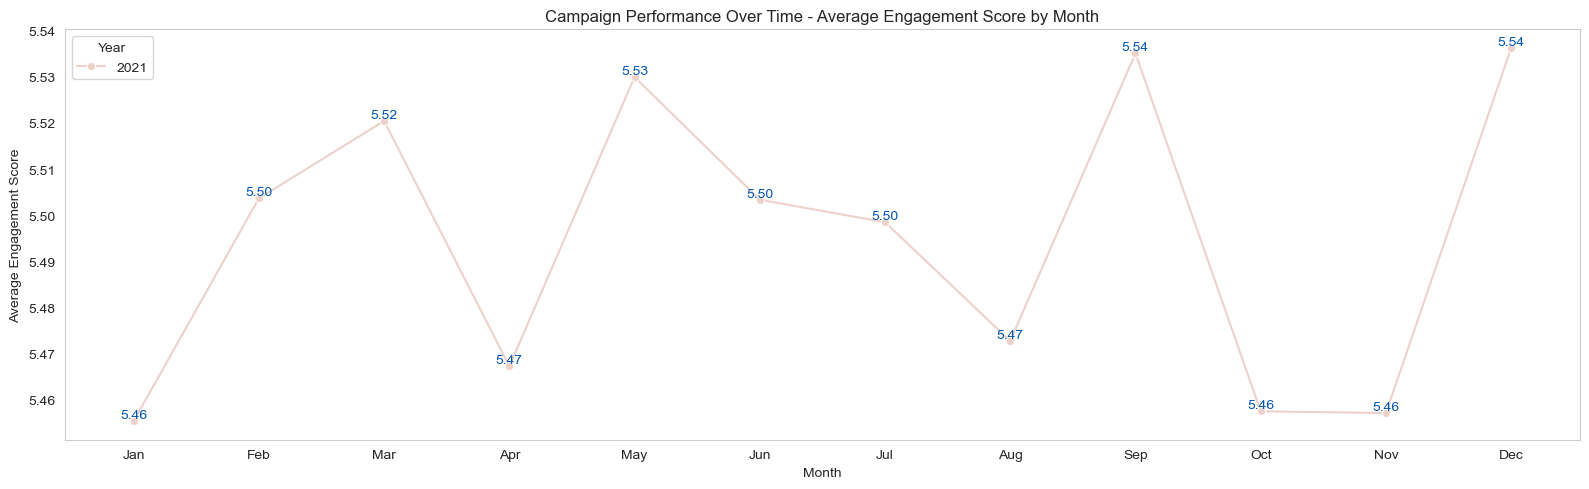

In [51]:
# Create a line plot to show the Average Engagement Score
plt.figure(figsize=(16, 5))
line_plot = sns.lineplot(x='Month', y='Engagement_Score', hue='Year', data=monthly_campaign_performance, marker='o')

# Annotate each data point with its value
for line in line_plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, 
                 y_value, 
                 f'{y_value:.2f}', 
                 ha='center', 
                 va='bottom', 
                 color='#0056B3')

# Set title and axis labels
plt.title('Campaign Performance Over Time - Average Engagement Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagement Score')

# Label the x-axis with month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Remove the grid
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


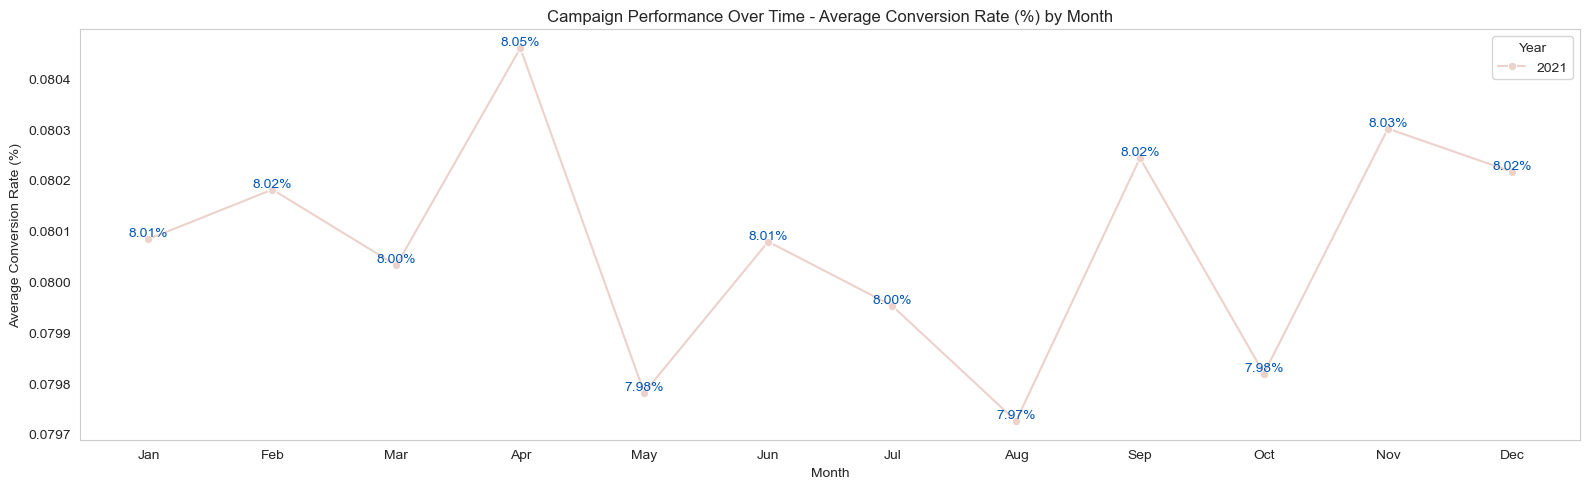

In [52]:
# Create a line plot to visualize Average Conversion Rate
plt.figure(figsize=(16, 5))
line_plot = sns.lineplot(x='Month', y='Conversion_Rate', hue='Year', data=monthly_campaign_performance, marker='o')

# Add labels to each data point
for line in line_plot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_val, 
                 y_val, 
                 f'{y_val:.2%}', 
                 ha='center', 
                 va='bottom', 
                 color='#0056B3')

# Set the title and axis labels
plt.title('Campaign Performance Over Time - Average Conversion Rate (%) by Month')
plt.xlabel('Month')
plt.ylabel('Average Conversion Rate (%)')

# Format the x-axis with month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Disable the grid
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


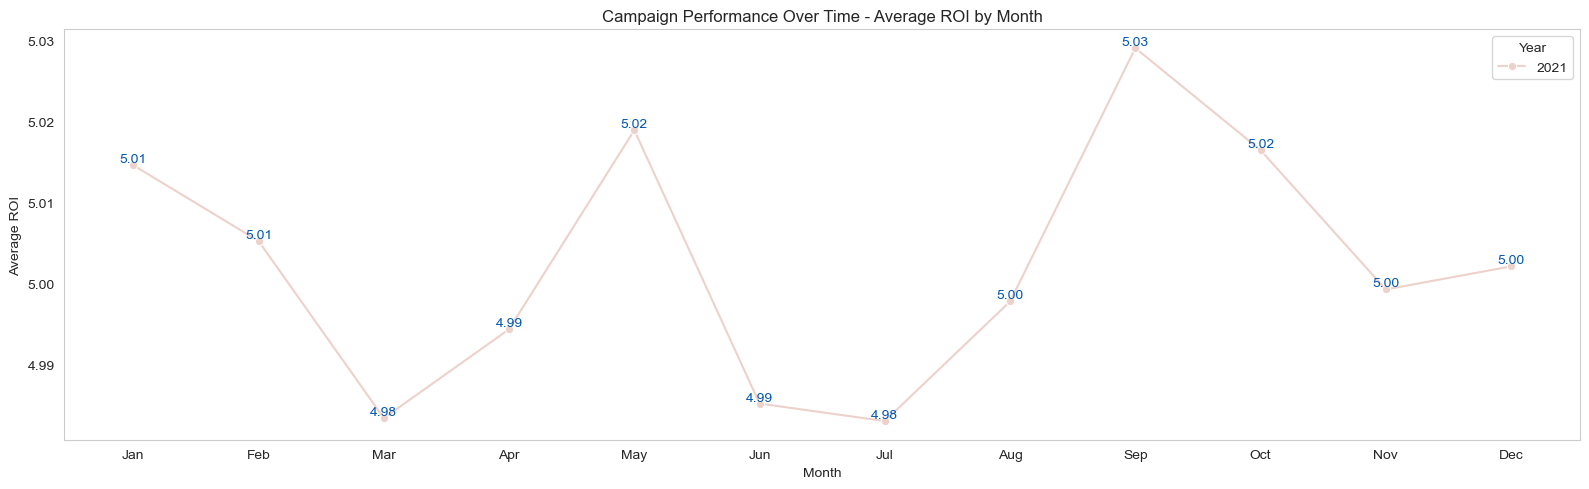

In [53]:
# Plot a line chart for Average ROI
plt.figure(figsize=(16, 5))
line_chart = sns.lineplot(x='Month', y='ROI', hue='Year', data=monthly_campaign_performance, marker='o')

# Annotate each data point with its value
for line in line_chart.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, 
                 y_value, 
                 f'{y_value:.2f}', 
                 ha='center', 
                 va='bottom', 
                 color='#0056B3')

# Set the title and axis labels
plt.title('Campaign Performance Over Time - Average ROI by Month')
plt.xlabel('Month')
plt.ylabel('Average ROI')

# Label the x-axis with month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Turn off the grid
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


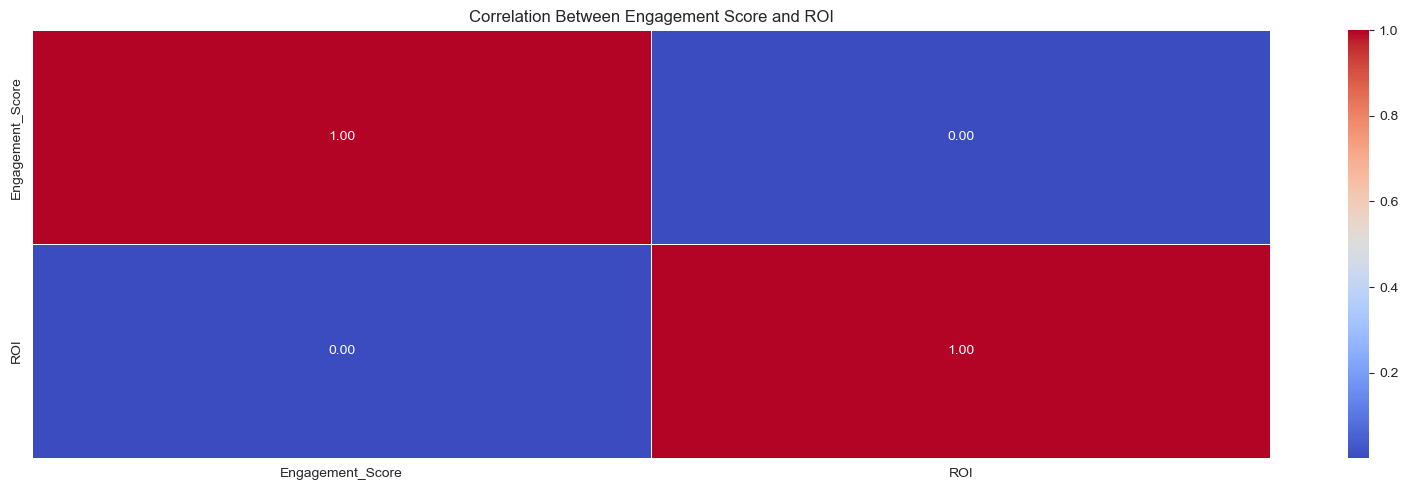

In [54]:
# Extract relevant columns for correlation analysis
metrics_for_correlation = df[['Engagement_Score', 'ROI']]

# Compute the correlation matrix
correlation_of_metrics = metrics_for_correlation.corr()

# Generate a heatmap to display the correlation
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_of_metrics, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Engagement Score and ROI')
plt.xticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()


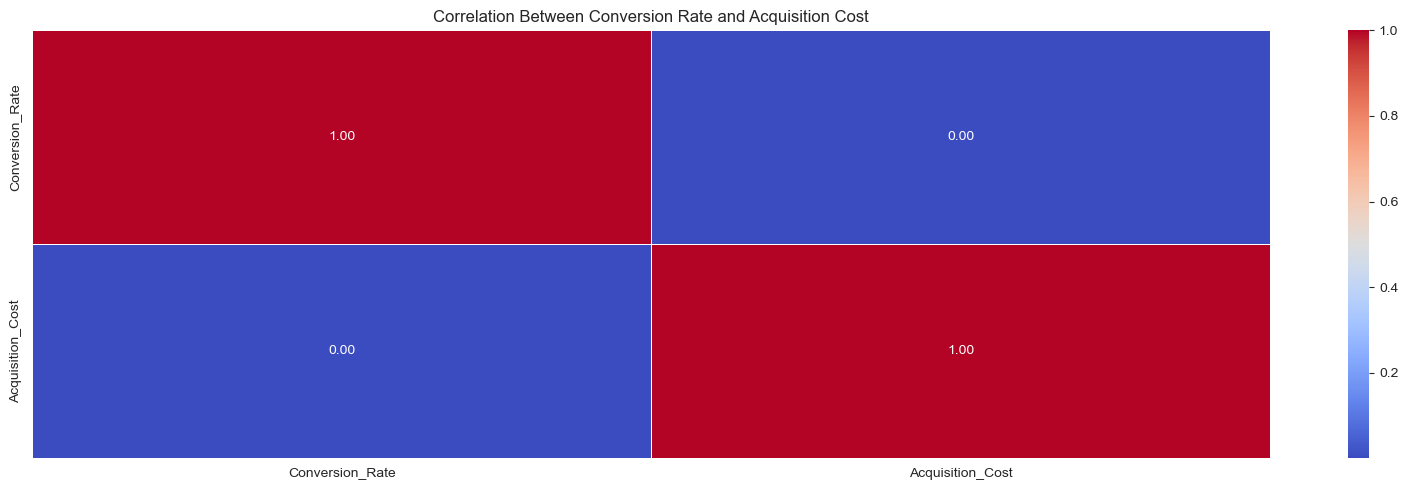

In [55]:
# Extract relevant columns for correlation analysis
metrics_for_conversion_and_cost = df[['Conversion_Rate', 'Acquisition_Cost']]

# Compute the correlation matrix
correlation_of_conversion_and_cost = metrics_for_conversion_and_cost.corr()

# Generate a heatmap to visualize the correlation
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_of_conversion_and_cost, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Conversion Rate and Acquisition Cost')
plt.xticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()


The examination of the marketing campaign's monthly performance uncovers a complex connection between engagement scores and return on investment (ROI).

The heatmap visualization clearly illustrates these correlation patterns, showing that higher engagement scores tend to correlate with better ROI. 

This highlights the significance of prioritizing engagement strategies to boost financial outcomes. 

By applying these insights, future campaigns can be refined to enhance both engagement and ROI, leading to more efficient marketing strategies and improved overall performance.